In [1]:
import numpy as np 
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data_folder = r"C:\Users\pipi3\Desktop\Course\year3_sem3 (Japan)\FYP\input_data\vgchartz";

In [3]:
#raw data
df = pd.read_excel(data_folder+"\\Global Yearly Chart.xlsx", sheetname='2017')
df.head()

,Rank,Game,Platform,Publisher,Genre,Week,Yearly,Total
0.0,1.0,Horizon: Zero Dawn,PS4,Sony Computer Entertainment,Action,12.0,2875704,2875704.0
1.0,2.0,The Legend of Zelda: Breath of the Wild,NS,Nintendo,Action,12.0,2837078,2837078.0
2.0,3.0,Resident Evil VII: Biohazard,PS4,Capcom,Action,17.0,2028360,2028360.0
3.0,4.0,Tom Clancy's Ghost Recon Wildlands,PS4,Ubisoft,Shooter,11.0,1928638,1928638.0
4.0,5.0,Mario Kart 8 Deluxe,NS,Nintendo,Racing,4.0,1834920,1834920.0


In [14]:
#create pivot table (Publisher vs Count of Publisher)
for i in range(12):
    if((i+5) < 10):
        sname = '200'+str(i+5)
    else:
        sname = '20'+str(i+5)        
    df = pd.read_excel(data_folder+"\\Global Yearly Chart.xlsx", sheetname=sname)
    locals()["pt"+str(i+5)] = df.pivot_table(values='Game', index=['Platform'], aggfunc='count')

#combine each worksheet result
df = pd.concat([pt5, pt6, pt7, pt8, pt9, pt10, pt11, pt12, pt13, pt14, pt15, pt16], axis=1)
pd.options.display.float_format = '{:,.0f}'.format
df.columns = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']
df = df.fillna(0)
df2 = df.transpose()
df2.reset_index(level=0, inplace=True)
df2 = df2.rename(columns = {'index':'Year'})
df2 = df2[['Year', '3DS', 'DS','Wii', 'WiiU', 'PS3', 'PS4', 'PSP', 'PSV', 'X360', 'XOne', 'PC']]
df2

,Year,3DS,DS,Wii,WiiU,PS3,PS4,PSP,PSV,X360,XOne,PC
0,2005,0,41,0,0,0,0,47,0,10,0,2
1,2006,0,41,6,0,1,0,28,0,23,0,1
2,2007,0,31,20,0,16,0,11,0,20,0,2
3,2008,0,30,21,0,17,0,7,0,25,0,0
4,2009,0,27,20,0,20,0,3,0,29,0,1
5,2010,0,19,20,0,30,0,5,0,23,0,3
6,2011,5,5,20,0,31,0,0,0,33,0,5
7,2012,10,4,14,2,32,0,0,0,32,0,6
8,2013,15,1,8,6,31,5,0,0,28,3,3
9,2014,15,0,2,8,19,27,0,0,12,15,2


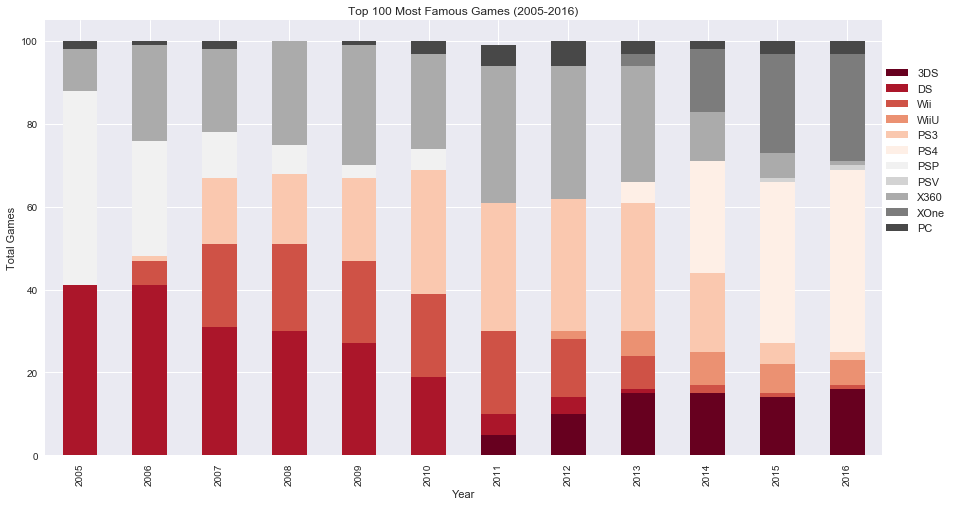

In [5]:
colors = plt.cm.RdGy(np.linspace(0, 1, 12))
ax = df2.plot(kind='bar',
         stacked=True, 
         align='center', 
         figsize=(15,8), 
         color=colors,
         title='Top 100 Most Famous Games (2005-2016)')
ax.set_xlabel("Year")
ax.set_ylabel("Total Games")
ax.set_xticklabels(df2['Year'])
plt.legend(loc=(1, 0.5),prop={'size':11})
ax

In [6]:
#create pivot table (Publisher vs Count of Platform in 2017)
df = pd.read_excel(data_folder+"\\Global Yearly Chart.xlsx", sheetname='2017')
pt = df.pivot_table(values='Game', columns='Platform', index=['Publisher'], aggfunc='count').fillna(0)
pt.reset_index(level=0, inplace=True)
#pt

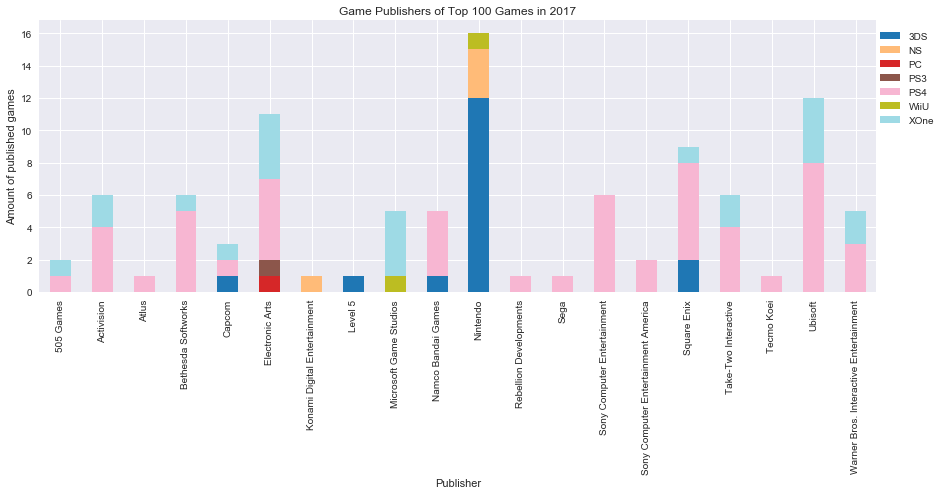

In [7]:
colors = plt.cm.tab20(np.linspace(0, 1, 7))
ax = pt.plot(kind='bar',
             stacked=True,
             figsize=(15,5),
             color=colors,
             title='Game Publishers of Top 100 Games in 2017')
ax.set_xlabel("Publisher")
ax.set_ylabel("Amount of published games")
ax.set_xticklabels(pt['Publisher'])
plt.legend(loc=(1, 0.6),prop={'size':10})
ax

In [8]:
#create pivot table (Publisher vs Count of Platform from 2005 to 2017)
for i in range(13):
    if((i+5) < 10):
        sname = '200'+str(i+5)
    else:
        sname = '20'+str(i+5)        
    df = pd.read_excel(data_folder+"\\Global Yearly Chart.xlsx", sheetname=sname)
    locals()["pt"+str(i+5)] = df.pivot_table(values='Game', columns='Platform', index=['Publisher'], aggfunc='count')

#combine each worksheet result
df = pd.concat([pt5, pt6, pt7, pt8, pt9, pt10, pt11, pt12, pt13, pt14, pt15, pt16, pt17])
df.reset_index(level=0, inplace=True)
df2 = df.groupby(df['Publisher']).sum() #aggfunc='count'
df2.reset_index(level=0, inplace=True)
df2 = df2.fillna(0)
#df2

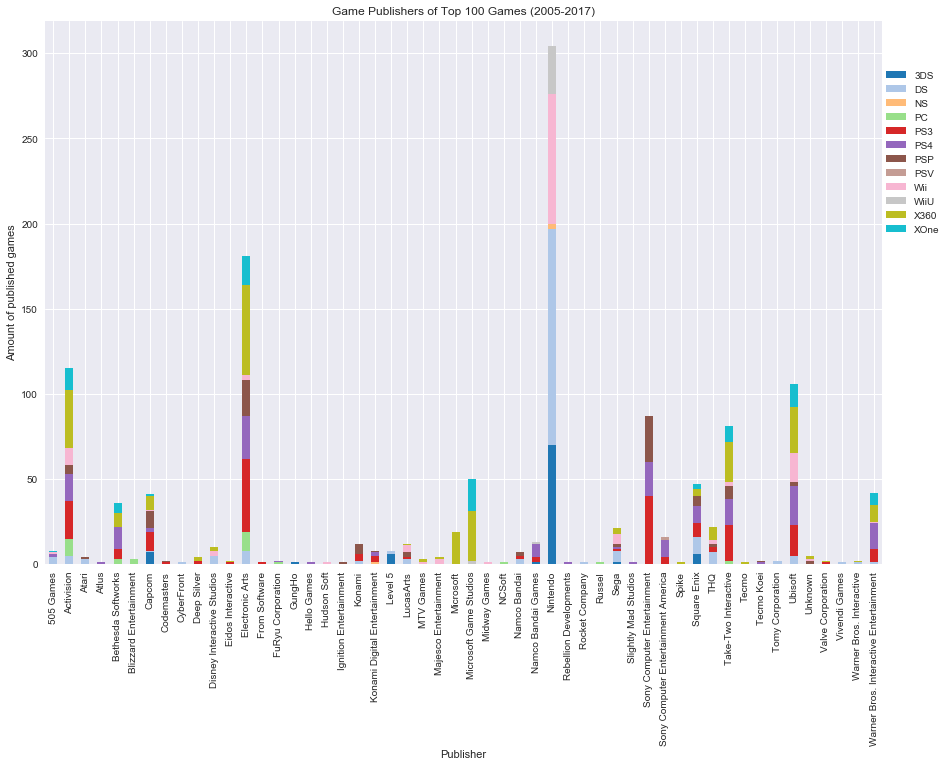

In [9]:
colors = plt.cm.tab20(np.linspace(0, 1, 13))
ax = df2.plot(kind='bar',
             stacked=True,
             figsize=(15,10),
             color=colors,
             title='Game Publishers of Top 100 Games (2005-2017)')
ax.set_xlabel("Publisher")
ax.set_ylabel("Amount of published games")
ax.set_xticklabels(df2['Publisher'])
plt.legend(loc=(1, 0.6),prop={'size':10})
ax

In [10]:
#df3 = df2[df2.sum(axis=1) < 101]

In [11]:
#Each Platform vs Publisher (from 2005 to 2017)
df4 = df2.set_index(['Publisher'])
df4 = df4.transpose()
df4

Publisher,505 Games,Activision,Atari,Atlus,Bethesda Softworks,Blizzard Entertainment,Capcom,Codemasters,CyberFront,Deep Silver,...,Take-Two Interactive,Tecmo,Tecmo Koei,Tomy Corporation,Ubisoft,Unknown,Valve Corporation,Vivendi Games,Warner Bros. Interactive,Warner Bros. Interactive Entertainment
3DS,0,0,0,0,0,0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DS,4,5,3,0,0,0,1,0,1,0,...,0,0,0,2,5,0,0,1,1,1
NS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PC,0,10,0,0,3,3,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
PS3,0,22,0,0,6,0,11,1,0,2,...,21,0,0,0,18,0,1,0,0,8
PS4,2,16,0,1,13,0,2,0,0,0,...,15,0,1,0,23,0,0,0,0,15
PSP,0,5,1,0,0,0,10,1,0,0,...,8,0,1,0,2,2,0,0,0,0
PSV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Wii,1,10,0,0,0,0,1,0,0,0,...,2,0,0,0,17,1,0,0,0,1
WiiU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


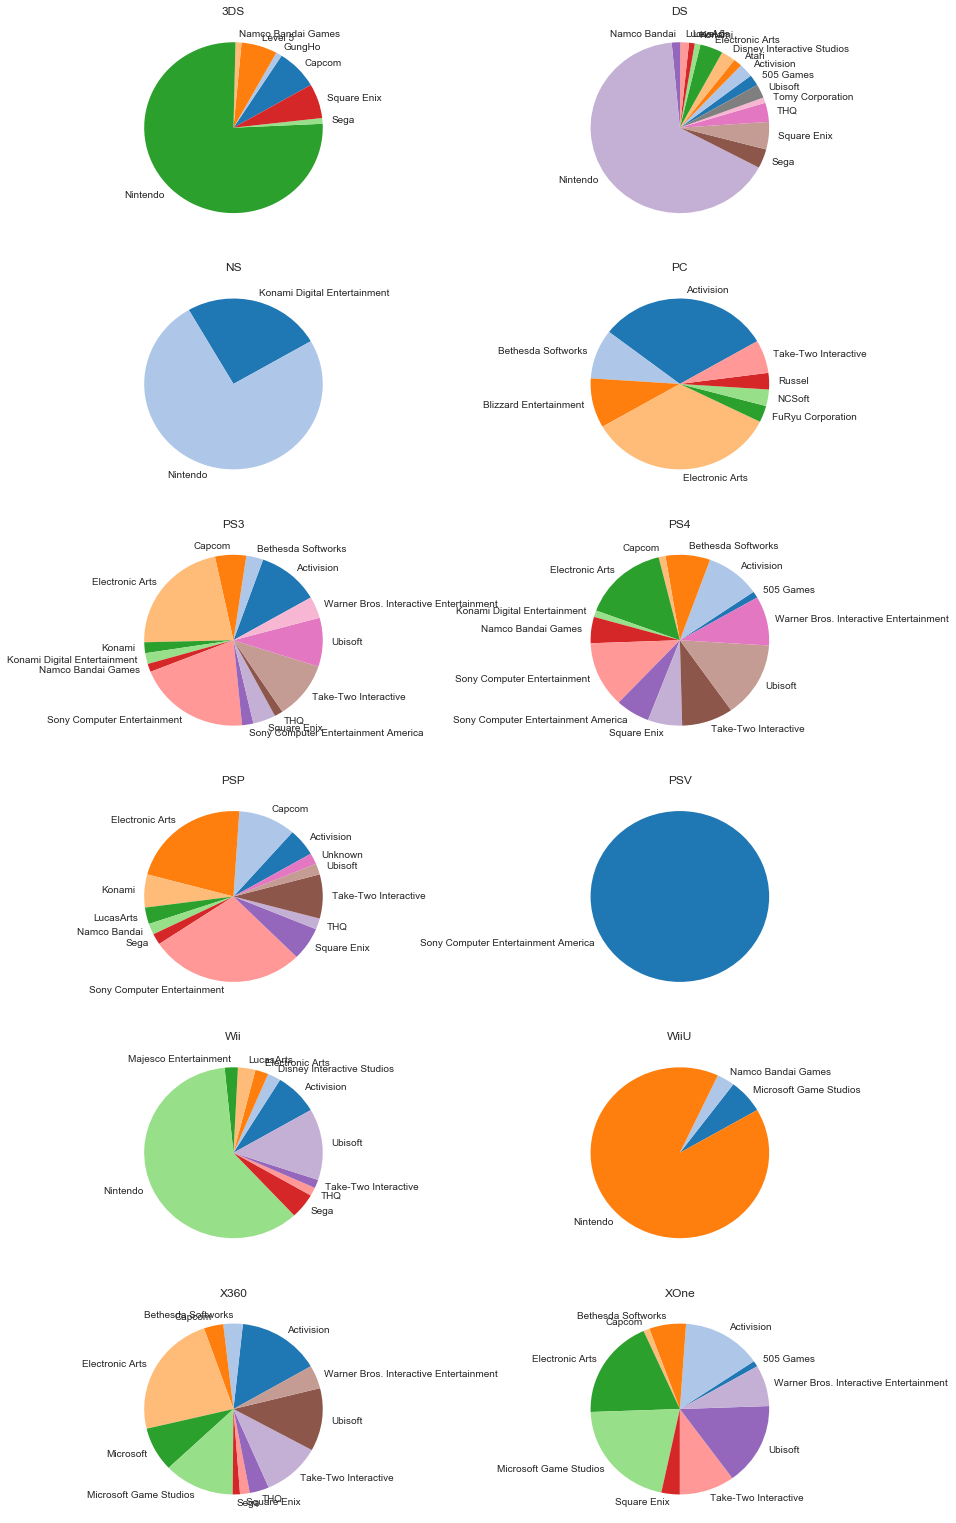

In [12]:
colors = plt.cm.tab20(np.linspace(0, 1, 20))
fig, axes = plt.subplots(6, 2, figsize=(12, 27.5))

for i, (idx, row) in enumerate(df4.iterrows()):
    ax = axes[i // 2, i % 2]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, labels=row.index, startangle=30, colors=colors)
    ax.set_title(idx)

fig.subplots_adjust(wspace=1)